## Определение невыгодных источников трафика для Яндекс.Афиша

Отдел маркетинговой аналитики Яндекс.Афиши просит **помочь снизить расходы — отказаться от невыгодных источников трафика** и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период, статистика рекламных расходов.

Предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

#### Оглавление:

1. [Открытие данных](#1)
    * [Подготовка данных](#2)
    
    
2. [Расчет метрик и построение графиков](#3)
    * [Продуктовые метрики](#4)
    * [Метрики электронной коммерции](#5)
    * [Маркетинговые метрики](#6)


3. [Выводы и рекомендации](#7)

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

## Открытие данных
<a id="1"></a>

In [2]:
# функция для удобства чтения файлов локально и на сервере школы

def read_csv(file):
    file = 'datasets/' + file + '.csv'
    try:
        return pd.read_csv('/' + file)
    except FileNotFoundError:
        return pd.read_csv(file)

In [3]:
# функция для чтения файлов локально и на сервере школы

visits_log = read_csv('visits_log')
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# выгрузка всех заказов за этот период

orders_log = read_csv('orders_log')
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
# статистика рекламных расходов

costs = read_csv('costs')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Подготовим данные. Убедимся, что тип данных во всех колонках соответствует сохранённым в них значениям.
<a id="2"></a>

In [6]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Приведем данные к нужным форматам и к нижнему реестру для удобства работы с данными.

In [7]:
visits_log['End Ts'] = pd.to_datetime(visits_log['End Ts'], format="%Y-%m-%d %H:%M:%S")
visits_log['Start Ts'] = pd.to_datetime(visits_log['Start Ts'], format="%Y-%m-%d %H:%M:%S")

In [8]:
visits_log.columns = visits_log.columns.str.lower()

In [9]:
# для удобства также переименуем названия столбцов

visits_log = visits_log.rename(columns={'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts'})

Проанализируем выбросы в визитах по источнику.

In [10]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Есть 6 и 7 источник, которых мало и их нет в costs.



In [11]:
visits_log['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [12]:
# выведем их

visits_log.query('source_id in [6,7]')

,device,end_ts,source_id,start_ts,uid
14834,desktop,2017-12-02 23:34:00,7,2017-12-02 23:21:00,16865718259540502578
16044,desktop,2017-12-28 01:09:00,6,2017-12-28 00:48:00,266932982800602818
33671,desktop,2017-12-25 09:50:00,7,2017-12-25 09:49:00,11123532188766338866
37719,desktop,2018-02-02 11:30:00,7,2018-02-02 11:28:00,6003985003549207556
41606,desktop,2017-07-05 22:29:00,7,2017-07-05 22:22:00,13356978538990003750
42765,desktop,2017-10-14 22:27:00,7,2017-10-14 22:26:00,4650558368878258850
45637,touch,2017-10-02 21:28:00,7,2017-10-02 21:26:00,4698643119707143969
74848,desktop,2017-07-01 18:32:00,6,2017-07-01 18:26:00,981265952898030128
83135,desktop,2017-08-17 11:56:00,7,2017-08-17 10:28:00,11377414203346034748
91126,touch,2017-08-28 16:27:00,6,2017-08-28 16:24:00,14543303339731526429


In [13]:
# уберем их из данных

visits_log.query('source_id not in [6,7]', inplace=True)

In [14]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [16]:
orders_log.columns = orders_log.columns.str.lower()

In [17]:
orders_log = orders_log.rename(columns={'buy ts':'buy_ts'})

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [19]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [20]:
costs.columns = costs.columns.str.lower()

Проверим на дубликаты:

In [21]:
visits_log.duplicated().sum()

0

In [22]:
orders_log.duplicated().sum()

0

In [23]:
costs.duplicated().sum()

0

Проверим лог с визитами:

In [24]:
# проверка start_ts > end_ts
# всего строк 359400

(visits_log['start_ts'] > visits_log['end_ts']).sum()

2

Есть ошибки в логах с визитами касательно временных отметок. В двух строчках время начало сессии превышает время окончания сессии. 

In [25]:
visits_log.query('start_ts > end_ts')

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Две строчки не критичны для нашего анализа, и мы можем избавиться от них.

In [26]:
visits_log = visits_log.drop(visits_log[visits_log.start_ts > visits_log.end_ts].index)

visits_log.query('start_ts > end_ts')

,device,end_ts,source_id,start_ts,uid


Проверим лог с покупками:

In [27]:
orders_log['uid'].nunique(), visits_log['uid'].nunique()

(36523, 228139)

Количество уникальных пользователей в логе с покупками значительно меньше, чем в логе с визитам - по идее все строки должны говорить о совершенных покупках.

In [28]:
# проверка revenue на нулевые значения - строк 50415

(orders_log['revenue'] <= 0).sum() 

51

In [29]:
orders_log.query('revenue <= 0')

,buy_ts,revenue,uid
1802,2017-06-22 18:19:00,0.0,17030528792926543083
2787,2017-07-07 15:54:00,0.0,10281425020415612933
4783,2017-08-02 14:54:00,0.0,184148767273119549
5095,2017-08-09 14:48:00,0.0,5603453646174104178
5863,2017-08-23 13:43:00,0.0,5603453646174104178
6393,2017-08-30 16:30:00,0.0,5603453646174104178
6995,2017-09-06 13:57:00,0.0,5603453646174104178
7104,2017-09-07 14:37:00,0.0,5603453646174104178
7488,2017-09-11 16:53:00,0.0,10169885790465067808
8160,2017-09-18 16:49:00,0.0,2883839899480223178


In [30]:
orders_log['revenue'].isna().sum()

0

Есть нулевые значения в 'revenue' в логе с покупками.

Явно произошла ошибка, возможно, эти покупки/оплата по ним не прошли, но в базе они были засчитаны с нулевой выручкой. Или так были засчитаны возвраты? Для нашего анализа нас интересуют покупки с реальной суммой в у.е. Поэтому мы можем удалить нулевые строки.

In [31]:
orders_log.query('revenue > 0', inplace=True)

In [32]:
sum(costs['costs'] == 0)

0

Наши данные подготовлены.

## Расчет метрик и построение графиков
<a id="3"></a>

**Продуктовые метрики**

Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период, а также построим график изменения метрик во времени.
<a id="4"></a>

In [33]:
visits_log['session_year'] = visits_log['start_ts'].dt.year
visits_log['session_month'] = visits_log['start_ts'].dt.month

try:
    visits_log['session_week'] = visits_log['start_ts'].dt.week  
except:
    visits_log['session_week'] = visits_log['start_ts'].dt.isocalendar().week
    
visits_log['session_date'] = visits_log['start_ts'].dt.date

visits_log.head()

<ipython-input-33-76dc70af0f09>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits_log['session_week'] = visits_log['start_ts'].dt.week


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [34]:
# DAU (daily active users) 
dau_total = visits_log.groupby('session_date').agg({'uid': 'nunique'})
dau_total.mean()

uid    907.884615
dtype: float64

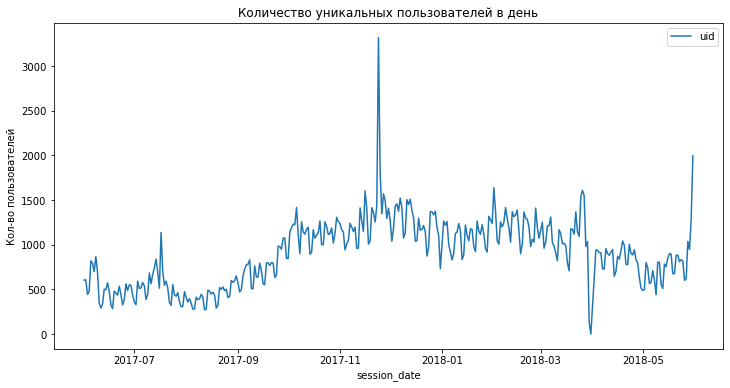

In [35]:
_ = dau_total.plot(figsize=(12, 6))

plt.xlabel('session_date') 
plt.ylabel('Кол-во пользователей') 
_ = plt.title('Количество уникальных пользователей в день')

In [36]:
# WAU (weekly active users)
wau_total = visits_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_total.mean()

uid    5715.528302
dtype: float64

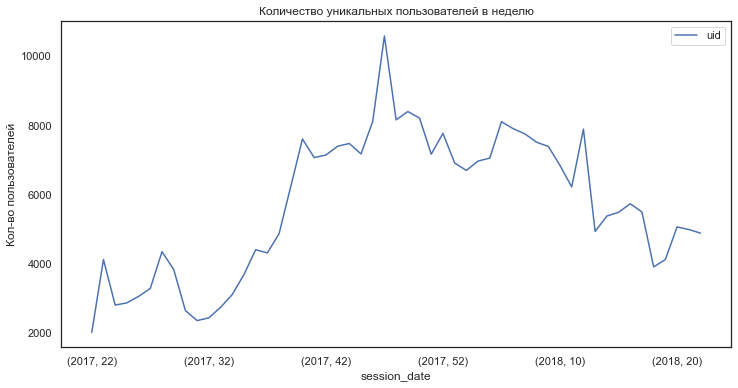

In [135]:
_ = wau_total.plot(figsize=(12, 6))

plt.xlabel('session_date') 
plt.ylabel('Кол-во пользователей') 
_ = plt.title('Количество уникальных пользователей в неделю')

In [38]:
# MAU (monthly active users)
mau_total = visits_log.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_total.mean()

uid    23225.583333
dtype: float64

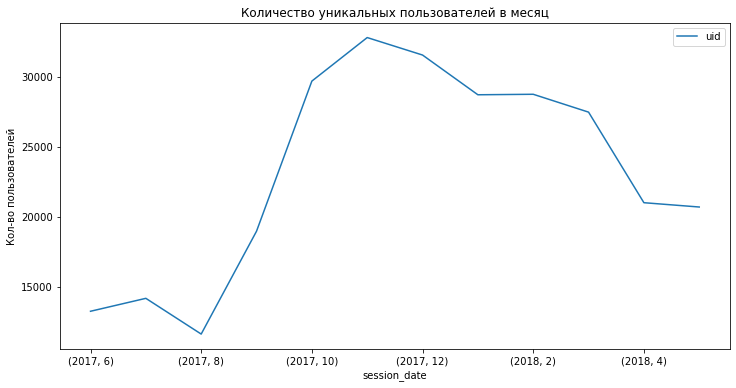

In [39]:
_ = mau_total.plot(figsize=(12, 6))

plt.xlabel('session_date') 
plt.ylabel('Кол-во пользователей') 
_ = plt.title('Количество уникальных пользователей в месяц')

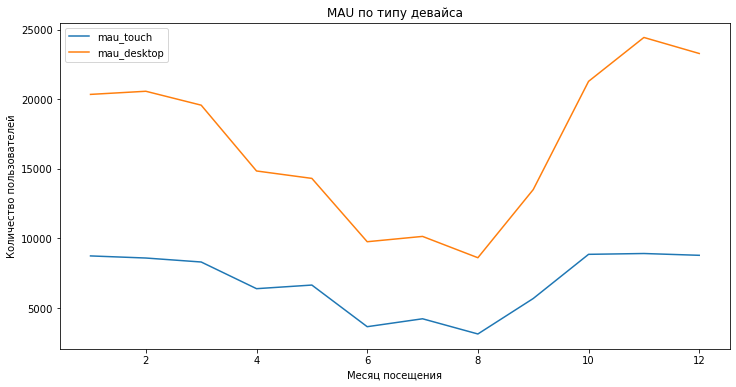

In [40]:
visits_log_desktop = visits_log.query('device == "desktop"')
mau_total_desktop = visits_log_desktop.groupby(['session_month']).agg({'uid': 'nunique'})
mau_total_desktop = mau_total_desktop.rename(columns={'uid': 'desktop_users'})

visits_log_touch = visits_log.query('device == "touch"')
mau_total_touch = visits_log_touch.groupby(['session_month']).agg({'uid': 'nunique'})
mau_total_touch = mau_total_touch.rename(columns={'uid': 'touch_users'})

plt.figure(figsize=(12,6))
plt.plot(mau_total_touch)
plt.plot(mau_total_desktop)

plt.title('MAU по типу девайса')
plt.xlabel('Месяц посещения')
plt.ylabel('Количество пользователей')
plt.legend(['mau_touch', 'mau_desktop'])

plt.show()

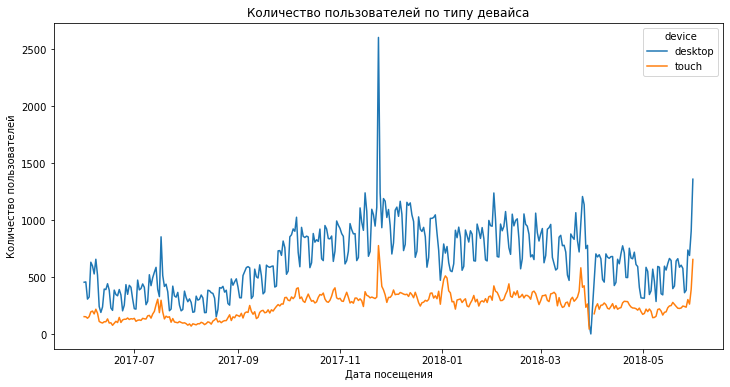

In [41]:
visits_log.pivot_table(index='session_date', columns='device', values='uid', aggfunc='nunique').plot(figsize=(12,6))

plt.title('Количество пользователей по типу девайса')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата посещения')

plt.show()

Можно отметить, что наибольший всплеск пользователей на сайте был в ноябре-декабре 2017ого. Возможно, это связано с праздниками, концом года, когда пользователи ищут мероприятия. Удивительно, что лето 2017ого не отличается большой активностью, мы не имеем полных данных за лето 2018ого, но из графиков видно, что ситуация немного уучшилась. 

Намного больше пользователей заходят через desktop устройства. Возможно, стоит узнать, насколько удобна для пользователей ("user-friendly") мобильная версия.

Определим, сколько раз за день пользователи в среднем заходят на сайт. Выясним, как изменяется эта метрика с течением времени.

In [42]:
# для удобства подсчетов
# обозначим единицами сессии (1 строчка = 1 сессия)
visits_log['n'] = 1

In [43]:
# кол-во заходов на сайт на пользователя в день

visits_per_user_day = visits_log.groupby(['uid', 'session_date']).agg({'n':'sum'})
visits_per_user_day.mean()

n    1.087409
dtype: float64

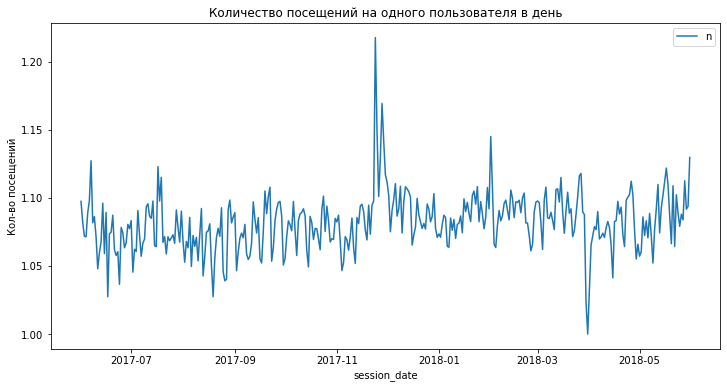

In [44]:
# график среднего значения посещений пользователем за год

visits_per_user_day = visits_log.groupby(['uid', 'session_date'], as_index=False).agg({'n':'sum'})
visits_per_user_day = visits_per_user_day.groupby(['session_date']).agg({'n':'mean'})

_ = visits_per_user_day.plot(figsize=(12,6))

plt.xlabel('session_date') 
plt.ylabel('Кол-во посещений') 

_ = plt.title('Количество посещений на одного пользователя в день')

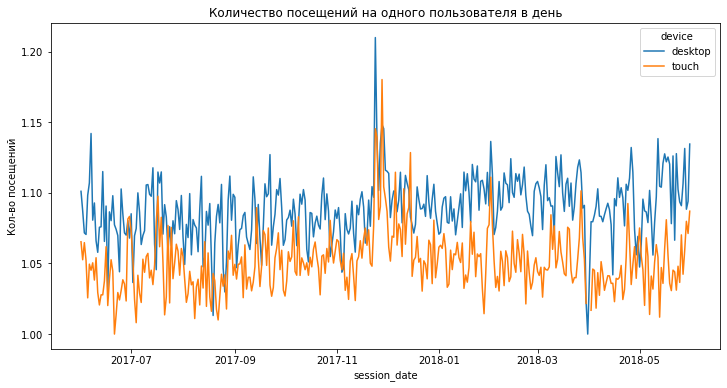

In [45]:
# по устройствам

visits_per_user_day_d = visits_log.groupby(['uid', 'session_date','device'], as_index=False).agg({'n':'sum'})
visits_per_user_day_d = visits_per_user_day_d.groupby(['session_date','device'], as_index=False).agg({'n':'mean'})
visits_per_user_day_d.pivot_table(index='session_date', columns='device', values='n', aggfunc='mean').plot(figsize=(12,6))


plt.xlabel('session_date') 
plt.ylabel('Кол-во посещений') 

plt.title('Количество посещений на одного пользователя в день')
plt.show()

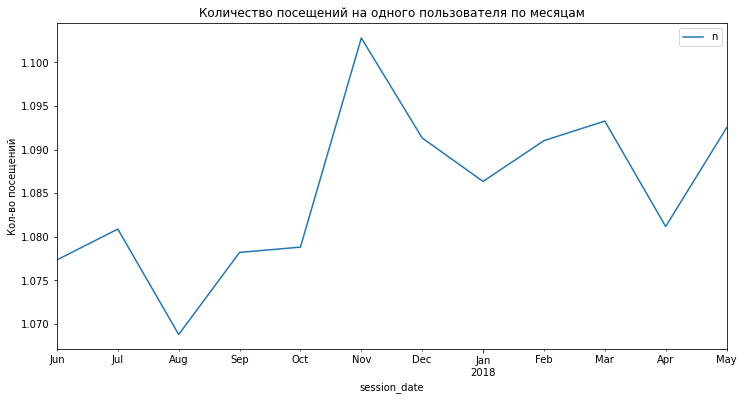

In [46]:
# график среднего значения посещений пользователем за год ПО МЕСЯЦАМ

visits_log['session_month'] = visits_log['start_ts'].astype('datetime64[M]')


visits_per_user_day = visits_log.groupby(['uid', 'session_date', 'session_month'], as_index=False).agg({'n':'sum'})
visits_per_user_day = visits_per_user_day.groupby(['session_month']).agg({'n':'mean'})

_ = visits_per_user_day.plot(figsize=(12,6))

plt.xlabel('session_date') 
plt.ylabel('Кол-во посещений') 

_ = plt.title('Количество посещений на одного пользователя по месяцам')

Количество посещений на одного пользователя сильно не отличается, на пользователя приходится в среднем один заход в день на сайт. Также, нет огромной разницы среди пользователей desktop и touch устройств. Пользователи с touch устройствами заходят чуть реже.

Исследуем, сколько времени пользователи проводят на сайте. Посчитаем среднюю продолжительность пользовательской сессии за весь период. Выясним, как продолжительность сессий распределена по пользователям.

In [47]:
visits_log['session_duration_sec'] = (visits_log['end_ts']- visits_log['start_ts']).dt.seconds
visits_log.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,n,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,1,0


In [48]:
# среднее время пользовательской сессии (в секундах)
# за все время

visits_log['session_duration_sec'].mode()

0    60
dtype: int64

In [49]:
print('Время на сайте в секундах:', int(visits_log['session_duration_sec'].median()))
print('Время на сайте в минутах:', int(visits_log['session_duration_sec'].median() / 60))

Время на сайте в секундах: 300
Время на сайте в минутах: 5


In [50]:
# среднее время сессии на пользователя 

sec_per_user = visits_log.groupby('uid').agg({'session_duration_sec':'median'})
sec_per_user

,session_duration_sec
uid,
11863502262781,360.0
49537067089222,120.0
297729379853735,60.0
313578113262317,540.0
325320750514679,300.0
...,...
18446403737806311543,180.0
18446424184725333426,0.0
18446556406699109058,120.0


In [51]:
# по device

visits_log.groupby('device').agg({'session_duration_sec':'median'})

,session_duration_sec
device,
desktop,360
touch,180


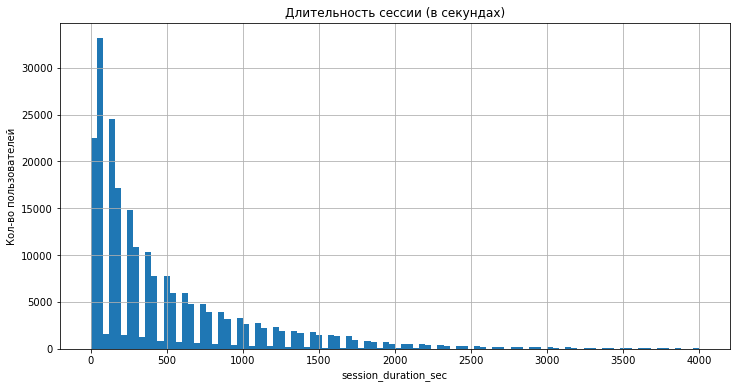

In [52]:
_ = sec_per_user.hist(bins=100, range=(0,4000), figsize=(12,6))

plt.xlabel('session_duration_sec') 
plt.ylabel('Кол-во пользователей') 

_ = plt.title('Длительность сессии (в секундах)')

В среднем, большинство пользователей проводят около пяти минут на сайте. Тем не менее график показывает довольно равномерное распределение: кажется, те, кто решают оформить заказ, проводят на сайте дольше.

Пользователи desktop проводят на сайте в два раза дольше, чем пользователи touch.

Рассчитаем Retention Rate, применяя когортный анализ.

In [53]:
# найдем первую сессию пользователя

visits_log['session_date'] = visits_log['session_date'].astype('datetime64[D]')
first_session_date_by_user = visits_log.groupby('uid')['session_date'].min()
first_session_date_by_user.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-06
297729379853735   2017-06-07
313578113262317   2017-09-18
325320750514679   2017-09-30
Name: session_date, dtype: datetime64[ns]

In [54]:
first_session_date_by_user.name = 'first_session_date'

In [55]:
visits_log = visits_log.join(first_session_date_by_user, on='uid')
visits_log.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,n,session_duration_sec,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0,2017-07-01


In [56]:
# cohort lifetime по месяцам

visits_log['cohort_lifetime'] = ((visits_log['session_date'] - visits_log['first_session_date'])\
/ np.timedelta64(1, 'M')).astype(int)

visits_log.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,n,session_duration_sec,first_session_date,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1,1080,2017-12-20,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1,1680,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0,2017-07-01,0


In [57]:
# месяц первого посещения сайта = когорта

visits_log['session_month'] = visits_log['session_month'].astype('datetime64[M]') 
visits_log['first_session_month'] = visits_log['first_session_date'].astype('datetime64[M]') 
visits_log.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,n,session_duration_sec,first_session_date,cohort_lifetime,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1,1080,2017-12-20,0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1,1680,2018-02-19,0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0,2017-07-01,0,2017-07-01


In [58]:
# статистика по когортам
# кол-во пользователей

cohorts = visits_log.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts = cohorts.rename(columns={'uid':'cohort_users'})
cohorts

,first_session_month,cohort_lifetime,cohort_users
0,2017-06-01,0,13257
1,2017-06-01,1,778
2,2017-06-01,2,739
3,2017-06-01,3,890
4,2017-06-01,4,898
...,...,...,...
73,2018-03-01,1,644
74,2018-03-01,2,302
75,2018-04-01,0,15708
76,2018-04-01,1,313


In [59]:
# кол-во пользователей в первый месяц по когортам

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','cohort_users']]
initial_users_count = initial_users_count.rename(columns={'cohort_users':'initial_users'})
initial_users_count

,first_session_month,initial_users
0,2017-06-01,13257
12,2017-07-01,13137
23,2017-08-01,10180
33,2017-09-01,16702
42,2017-10-01,25973
50,2017-11-01,27247
57,2017-12-01,25259
63,2018-01-01,22621
68,2018-02-01,22196
72,2018-03-01,20588


In [60]:
cohorts = cohorts.merge(initial_users_count,on='first_session_month')
cohorts

,first_session_month,cohort_lifetime,cohort_users,initial_users
0,2017-06-01,0,13257,13257
1,2017-06-01,1,778,13257
2,2017-06-01,2,739,13257
3,2017-06-01,3,890,13257
4,2017-06-01,4,898,13257
...,...,...,...,...
73,2018-03-01,1,644,20588
74,2018-03-01,2,302,20588
75,2018-04-01,0,15708,15708
76,2018-04-01,1,313,15708


In [61]:
# считаем retention по когортам по всем месяцам lifetime

cohorts['retention'] = cohorts['cohort_users']/cohorts['initial_users']
cohorts

,first_session_month,cohort_lifetime,cohort_users,initial_users,retention
0,2017-06-01,0,13257,13257,1.000000
1,2017-06-01,1,778,13257,0.058686
2,2017-06-01,2,739,13257,0.055744
3,2017-06-01,3,890,13257,0.067134
4,2017-06-01,4,898,13257,0.067738
...,...,...,...,...,...
73,2018-03-01,1,644,20588,0.031280
74,2018-03-01,2,302,20588,0.014669
75,2018-04-01,0,15708,15708,1.000000
76,2018-04-01,1,313,15708,0.019926


In [62]:
retention_pivot = cohorts.pivot_table(index='first_session_month',
                                      columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.058686,0.055744,0.067134,0.067738,0.068417,0.059893,0.054990,0.053934,0.046768,0.040281,0.032737
2017-07-01,1.0,0.051305,0.056025,0.053513,0.056862,0.046281,0.047195,0.043846,0.030905,0.027708,0.017356,NaN
2017-08-01,1.0,0.061493,0.061002,0.058055,0.044204,0.042043,0.040864,0.030747,0.026228,0.013163,NaN,NaN
2017-09-01,1.0,0.067716,0.063346,0.041372,0.039576,0.037421,0.028559,0.023710,0.010657,NaN,NaN,NaN
2017-10-01,1.0,0.062680,0.043699,0.038309,0.034382,0.025064,0.020406,0.010511,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.050831,0.041619,0.036298,0.027196,0.021507,0.010937,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.044420,0.034047,0.023516,0.020230,0.009818,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.043278,0.030149,0.021971,0.009062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.034736,0.022662,0.010182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


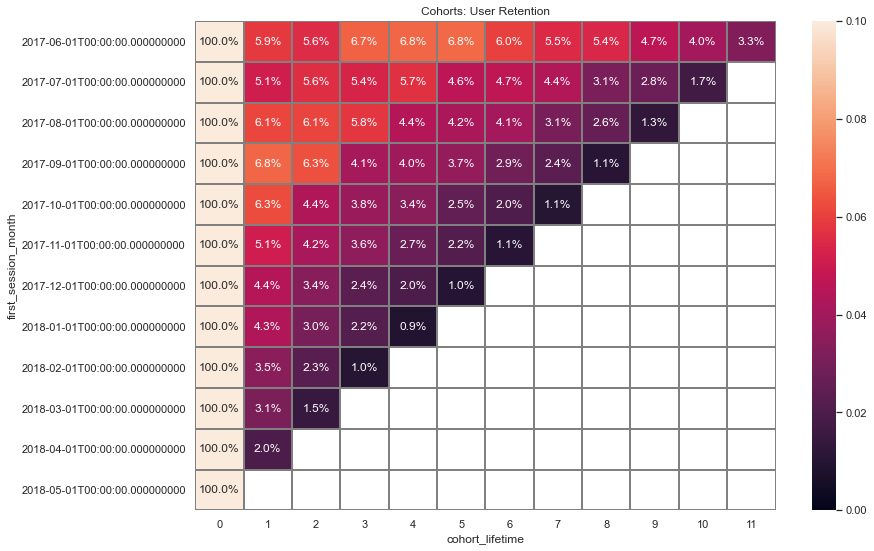

In [63]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1);

Все когорты показывают очень низкий retention - менее 7% пользователей возвращаются на сайт в первый же месяц. Все последующие когорты "падают" в удержании пользователей. Июньская когорта 2017ого справляется с удержанием лучше всего.

**Метрики электронной коммерции**
<a id="5"></a>

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [64]:
orders_log.head(3)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [65]:
visits_log.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,n,session_duration_sec,first_session_date,cohort_lifetime,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1,1080,2017-12-20,0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1,1680,2018-02-19,0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0,2017-07-01,0,2017-07-01


In [66]:
visits_log['session_date'] = visits_log['session_date'].astype('datetime64[D]')

In [67]:
# первые сессии каждого пользователя

first_session_ts = visits_log.groupby('uid')['start_ts'].min()
first_session_ts.name = 'first_session_ts'
visits_log = visits_log.merge(first_session_ts, on='uid')
first_session_ts.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_session_ts, dtype: datetime64[ns]

In [68]:
# первые покупки каждого пользователя

first_buy_ts = orders_log.groupby('uid')['buy_ts'].min()
first_buy_ts.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

In [69]:
# уберем NaN-ы

first_buy_duration = (first_buy_ts - first_session_ts).dropna()

In [70]:
first_buy_duration = pd.DataFrame(first_buy_duration, index=None, columns={'time'})
first_buy_duration.reset_index(level=0, inplace=True)
first_buy_duration

,uid,time
0,313578113262317,106 days 23:02:00
1,1575281904278712,0 days 00:00:00
2,2429014661409475,0 days 01:19:00
3,2464366381792757,0 days 19:44:00
4,2551852515556206,0 days 00:00:00
...,...,...
36503,18445147675727495770,95 days 19:33:00
36504,18445407535914413204,0 days 00:07:00
36505,18445601152732270159,231 days 11:03:00
36506,18446156210226471712,103 days 09:33:00


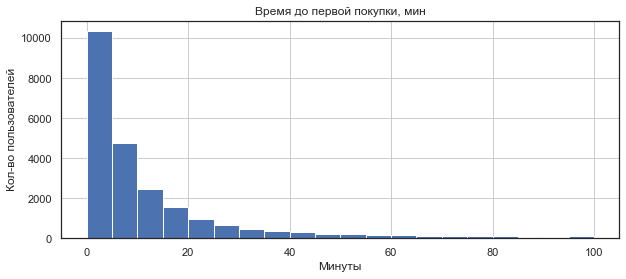

In [71]:
q = first_buy_duration['time'].astype(int) // 1e9 / 60
_ = q.hist(figsize=(10,4), bins=20, range=(0, 100))

plt.title('Время до первой покупки, мин')
plt.xlabel('Минуты')
_ = plt.ylabel('Кол-во пользователей')


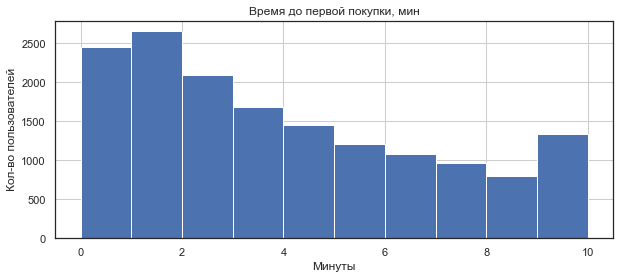

In [72]:
# построим гистограмму для каждой минуты, 
# чтобы увидеть глазами моду

q = first_buy_duration['time'].astype(int) // 1e9 // 60
_ = q.hist(figsize=(10,4), bins=10, range=(0, 10))

plt.title('Время до первой покупки, мин')
plt.xlabel('Минуты')
plt.ylabel('Кол-во пользователей')

plt.show()

In [73]:
# возьмем медиану 

first_buy_duration['time'].median()

Timedelta('0 days 00:16:00')

In [74]:
# мода

first_buy_duration['time'].mode()

0   0 days 00:01:00
dtype: timedelta64[ns]

Для тех, кто все же совершает покупки на сайте, в среднем проходит в пределах 16 минут - неплохо, учитывая специфику сайта. Главное, что это происходит в тот же день, когда пользователь попал на сайт. А больше всего покупок совершается за минуту - кажется, пользователи сразу приходят за конкретным событием. 

Применяя когортный анализ, рассчитаем среднее количество покупок на одного клиента за определённый период, например за 6 месяцев.

In [75]:
orders_log = orders_log.merge(first_buy_ts, on='uid')
orders_log = orders_log.rename(columns={'buy_ts_x':'buy_ts','buy_ts_y':'first_buy_ts'})
orders_log['first_buy_month'] = orders_log['first_buy_ts'].astype('datetime64[M]')
orders_log.head(20)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01 08:54:00,2017-06-01
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01 09:22:00,2017-06-01


In [76]:
# время с первой покупки до последующих покупок

orders_log['buy_lifetime'] = orders_log['buy_ts'] - orders_log['first_buy_ts']
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days


In [77]:
# маска по тем, кто делал покупки в течение 6 месяцев

mask = orders_log['buy_lifetime'] <= np.timedelta64(6, 'M')
orders_log_6m = orders_log[mask]
orders_log_6m.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days


In [78]:
# кол-во покупок за 6 месяцев на одного пользователя

orders_per_user = orders_log_6m.groupby('uid').agg({'uid':'count'})
orders_per_user.columns = ['orders']
orders_per_user.head(3)

,orders
uid,
313578113262317,1
1575281904278712,2
2429014661409475,1


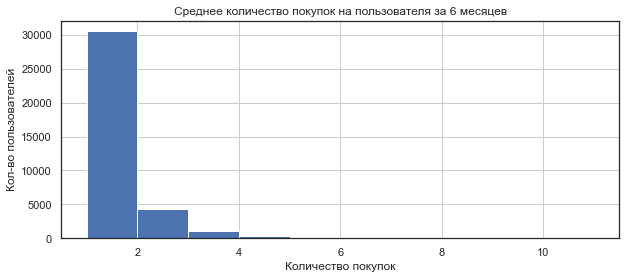

In [79]:
orders_per_user.hist(bins=10, range=(1, 11), figsize=(10,4))

plt.xlabel('Количество покупок') 
plt.ylabel('Кол-во пользователей') 

_ = plt.title('Среднее количество покупок на пользователя за 6 месяцев')

plt.show()

На пользователей, пользующихся сайтом в течение шести месяцев, приходится в основном всего одна покупка. Намного реже встречаются 2-4 покупки. Не густо.

In [80]:
# когорта для каждого пользователя

first_buy_month = orders_log[['uid','first_buy_month']]
first_buy_month.name = 'first_buy_month'
first_buy_month.head(3)

,uid,first_buy_month
0,10329302124590727494,2017-06-01
1,11627257723692907447,2017-06-01
2,17903680561304213844,2017-06-01


In [81]:
orders_per_user = orders_per_user.merge(first_buy_month, on='uid')
orders_per_user.head(3)

,uid,orders,first_buy_month
0,313578113262317,1,2018-01-01
1,1575281904278712,2,2017-06-01
2,1575281904278712,2,2017-06-01


In [82]:
# среднее количество покупок по когортам 
# за 6 месяцев

mean_orders_per_cohort = orders_per_user.groupby('first_buy_month', as_index=False).agg({'orders':'mean'})
mean_orders_per_cohort

,first_buy_month,orders
0,2017-06-01,32.006998
1,2017-07-01,8.139911
2,2017-08-01,14.816187
3,2017-09-01,5.683450
4,2017-10-01,2.534221
5,2017-11-01,5.937224
6,2017-12-01,6.258744
7,2018-01-01,4.838904
8,2018-02-01,2.897964
9,2018-03-01,5.315273


In [83]:
orders_log.head()

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0 days


In [84]:
# первая покупка пользователя = когорта

In [85]:
# cohort lifetime по месяцам

orders_log['cohort_lifetime'] = ((orders_log['buy_ts'] - orders_log['first_buy_month'])\
/ np.timedelta64(1, 'M')).astype(int)

orders_log.tail()

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime
50359,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,0 days,1
50360,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,0 days,1
50361,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,0 days,1
50362,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,0 days,1
50363,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01 00:02:00,2018-06-01,0 days,0


In [86]:
# статистика по покупкам для когорт

cohorts_orders = orders_log.groupby(['first_buy_month', 'cohort_lifetime', 'uid']).agg({'revenue':'count'})\
.reset_index()
cohorts_orders = cohorts_orders.rename(columns={'revenue':'cohort_orders'})
cohorts_orders

,first_buy_month,cohort_lifetime,uid,cohort_orders
0,2017-06-01,0,1575281904278712,2
1,2017-06-01,0,16233238570251706,1
2,2017-06-01,0,29085576454138824,1
3,2017-06-01,0,31782048561502182,1
4,2017-06-01,0,50884319066603964,1
...,...,...,...,...
41008,2018-05-01,1,18247150945586855751,1
41009,2018-05-01,1,18315976142101556204,1
41010,2018-05-01,1,18334852012373166529,1
41011,2018-05-01,1,18413715920446116327,1


In [87]:
# посчитаем количество покупок по каждой когорте каждый месяц

a = cohorts_orders.groupby(['first_buy_month', 'cohort_lifetime']).agg({'cohort_orders':'sum'}).reset_index()
a.head(3)

,first_buy_month,cohort_lifetime,cohort_orders
0,2017-06-01,0,2356
1,2017-06-01,1,173
2,2017-06-01,2,163


In [88]:
# и посчитаем количество покупателей в каждой когорте

b = cohorts_orders.groupby(['first_buy_month']).agg({'uid': 'nunique'}).reset_index()
b = b.rename(columns={'uid': 'cohort_buyers'})
b.head(3)

,first_buy_month,cohort_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369


In [89]:
# считаем среднее количество покупок на покупателя

c = a.merge(b, on='first_buy_month')
c['mean_orders'] = c['cohort_orders'] / c['cohort_buyers']
c

,first_buy_month,cohort_lifetime,cohort_orders,cohort_buyers,mean_orders
0,2017-06-01,0,2356,2022,1.165183
1,2017-06-01,1,173,2022,0.085559
2,2017-06-01,2,163,2022,0.080613
3,2017-06-01,3,233,2022,0.115232
4,2017-06-01,4,285,2022,0.140950
...,...,...,...,...,...
76,2018-04-01,0,2488,2274,1.094107
77,2018-04-01,1,194,2274,0.085312
78,2018-05-01,0,2840,2986,0.951105
79,2018-05-01,1,407,2986,0.136303


In [90]:
# pivot по покупкам на пользователя по когортам и lifetime

orders_pivot = c.pivot_table(
    index='first_buy_month',
    columns='cohort_lifetime',
    values='mean_orders'
)
orders_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,1.165183,0.085559,0.080613,0.115232,0.140950,0.108309,0.137982,0.081602,0.115727,0.069733,0.048467,0.041543
2017-07-01,1.114464,0.072320,0.062435,0.054110,0.037981,0.043704,0.030177,0.028096,0.030177,0.012487,0.027575,NaN
2017-08-01,1.060628,0.135866,0.073776,0.058437,0.060628,0.046019,0.040906,0.054054,0.034332,0.032871,NaN,NaN
2017-09-01,1.137263,0.083753,0.062040,0.063203,0.025979,0.045754,0.038387,0.021714,0.023653,NaN,NaN,NaN
2017-10-01,1.110369,0.105530,0.037558,0.026728,0.032488,0.022350,0.020046,0.028571,NaN,NaN,NaN,NaN
2017-11-01,1.177538,0.094654,0.043649,0.056400,0.029671,0.014958,0.024522,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.123516,0.088128,0.051142,0.038356,0.019863,0.023744,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.075897,0.116217,0.042988,0.019864,0.022235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.127910,0.055053,0.022460,0.018625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: Накопительное количество покупок'}, xlabel='cohort_lifetime', ylabel='first_buy_month'>

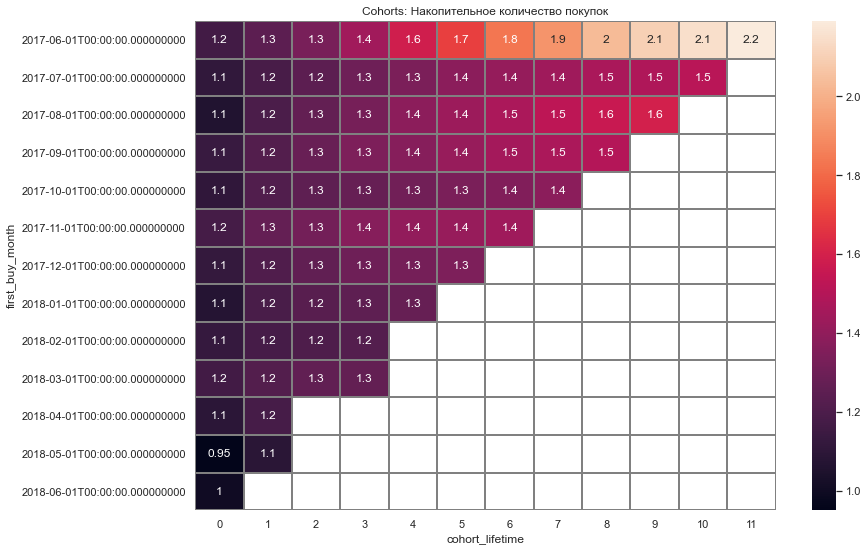

In [91]:
# посчитаем среднее количество покупок за несколько месяцев
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Накопительное количество покупок')
d = orders_pivot.cumsum(axis=1)
sns.heatmap(d, annot=True, linewidths=1, linecolor='gray')

В среднем, через шесть месяцев, количество покупок на покупателя примерно одно и тоже - 1.2-1.5 покупки. Июньская когорта 2017ого имеет наибольший показатель, достигая на седьмом месяце двух покупок на клиента. Все последующие когорты окупаются все хуже и хуже.

Рассчитаем среднюю выручку с пользователя. Покажим, как меняется эта метрика с течением времени.

In [92]:
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0


In [93]:
# месяц покупки

orders_log['buy_month'] = orders_log['buy_ts'].astype('datetime64[M]')
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0,2017-06-01


In [94]:
# выручка на пользователя по месяцам

revenue_by_month = orders_log.groupby(['buy_month', 'uid'], as_index=False).agg({'revenue':'sum'})
revenue_by_month.head(3)

,buy_month,uid,revenue
0,2017-06-01,1575281904278712,3.05
1,2017-06-01,16233238570251706,1.65
2,2017-06-01,29085576454138824,3.36


In [95]:
# выручка по месяцам

revenue_by_month = revenue_by_month.groupby('buy_month').agg({'revenue':'mean'})
revenue_by_month

,revenue
buy_month,
2017-06-01,4.726751
2017-07-01,6.323485
2017-08-01,5.954303
2017-09-01,6.675950
2017-10-01,5.989236
2017-11-01,5.958602
2017-12-01,7.370589
2018-01-01,4.981306
2018-02-01,6.002945


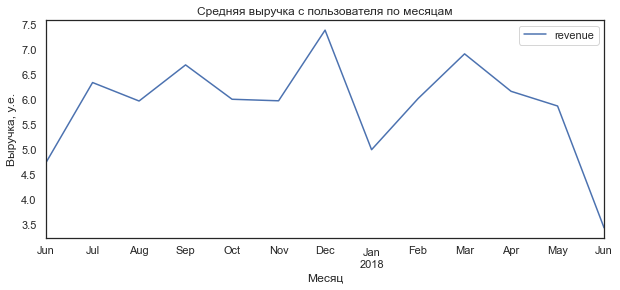

In [96]:
_ = revenue_by_month.plot(figsize=(10,4))

plt.xlabel('Месяц') 
plt.ylabel('Выручка, y.e.') 

_ = plt.title('Средняя выручка с пользователя по месяцам')

Больше всего выручки приносит декабрь, наверное, связано с праздниками и повышенным интересом к сайту. В целом выручка отстается на примерно одинаковом уровне весь год, 5-6 у.е. на пользователя. Июнь отличается низкими цифрами - возможно, мы не имеем полной информации по данному месяцу? 

In [97]:
# выручка по device

device_orders = visits_log.groupby(['device', 'uid'], as_index=False).agg({'n':'sum'})
orders_log_d = orders_log.merge(device_orders, on='uid')

print('Средняя выручка на пользователя')
print(orders_log_d.groupby('device').agg({'revenue':'mean'}))
print()
print('Средняя выручка за все время')
print(orders_log_d.groupby('device').agg({'revenue':'sum'}))

Средняя выручка на пользователя
          revenue
device           
desktop  5.203428
touch    4.788992

Средняя выручка за все время
           revenue
device            
desktop  224470.69
touch     61011.76


Пользователи desktop приносят больше денег сервису. Разница в средней выручке на пользователя относительно небольшая - 0.5 у.е., но так как в целом пользователей touch-устройств значительно меньше, чем desktop - в сумме средняя выручка за год различается критически (desktop приносит более чем в 3.6 раз больше выручки).

Выясним, как меняется во времени накопительный LTV по когортам. Сравним средний LTV по когортам за 6 месяцев. Оценим когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

In [98]:
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0,2017-06-01


In [99]:
first_buy_date = orders_log.groupby('uid')['buy_ts'].min()
first_buy_date.name = 'first_buy_date'
first_buy_date

uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: first_buy_date, Length: 36509, dtype: datetime64[ns]

In [100]:
orders_log = orders_log.merge(first_buy_date, on='uid')
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime,buy_month,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:27:00


In [101]:
# оставляем только строки первого посещения
first_visits_log = visits_log.query('first_session_ts==start_ts')
users_source = first_visits_log[['uid', 'source_id']]

users_source.head(3)

,uid,source_id
0,16879256277535980062,4
1,104060357244891740,2
2,7459035603376831527,5


In [102]:
# добавляем источник к покупкам
orders_log = orders_log.merge(users_source, on='uid')
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime,buy_month,first_buy_date,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:10:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:25:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:27:00,2


In [103]:
orders_log['first_buy_month'] = orders_log['first_buy_date'].astype('datetime64[M]')
orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime,buy_month,first_buy_date,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:10:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:25:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:27:00,2


In [104]:
# количество покупателей по когортам

cohort_sizes = orders_log.groupby(['first_buy_month', 'source_id']).agg({'uid':'nunique'}).reset_index()
cohort_sizes

,first_buy_month,source_id,uid
0,2017-06-01,1,190
1,2017-06-01,2,234
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
80,2018-05-01,4,804
81,2018-05-01,5,497
82,2018-05-01,9,60
83,2018-05-01,10,129


In [105]:
s = cohort_sizes.groupby('first_buy_month').agg({'uid': 'sum'})
s

,uid
first_buy_month,
2017-06-01,2022
2017-07-01,1922
2017-08-01,1368
2017-09-01,2579
2017-10-01,4340
2017-11-01,4078
2017-12-01,4380
2018-01-01,3373
2018-02-01,3651


In [106]:
# так как когорта это время первой покупки, 
# то пересчитаем cohort_lifetime

orders_log['cohort_lifetime'] = \
((orders_log['buy_ts'] - orders_log['first_buy_month']) \
/ np.timedelta64(1, 'M')).astype(int)

orders_log.head(3)

,buy_ts,revenue,uid,first_buy_ts,first_buy_month,buy_lifetime,cohort_lifetime,buy_month,first_buy_date,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:10:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:25:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0 days,0,2017-06-01,2017-06-01 00:27:00,2


In [107]:
# помесячная выручка по когортам + источник

cohort_revenue = orders_log.groupby(['first_buy_month', 'cohort_lifetime', 'source_id']).agg({'revenue':'sum'}).reset_index()
cohort_revenue

,first_buy_month,cohort_lifetime,source_id,revenue
0,2017-06-01,0,1,1386.03
1,2017-06-01,0,2,1046.00
2,2017-06-01,0,3,2804.34
3,2017-06-01,0,4,1959.84
4,2017-06-01,0,5,1898.89
...,...,...,...,...
522,2018-05-01,1,4,254.30
523,2018-05-01,1,5,302.42
524,2018-05-01,1,9,12.53
525,2018-05-01,1,10,175.59


In [108]:
r = orders_log.groupby(['first_buy_month', 'cohort_lifetime']).agg({'revenue':'sum'}).reset_index()
r

,first_buy_month,cohort_lifetime,revenue
0,2017-06-01,0,9567.14
1,2017-06-01,1,971.74
2,2017-06-01,2,838.58
3,2017-06-01,3,1978.49
4,2017-06-01,4,2009.91
...,...,...,...
76,2018-04-01,0,10601.18
77,2018-04-01,1,1209.43
78,2018-05-01,0,11166.41
79,2018-05-01,1,2759.35


In [109]:
cohort_ltv = cohort_sizes.merge(cohort_revenue, on=['first_buy_month', 'source_id'])
cohort_ltv

,first_buy_month,source_id,uid,cohort_lifetime,revenue
0,2017-06-01,1,190,0,1386.03
1,2017-06-01,1,190,1,407.65
2,2017-06-01,1,190,2,386.92
3,2017-06-01,1,190,3,746.75
4,2017-06-01,1,190,4,811.20
...,...,...,...,...,...
522,2018-05-01,9,60,0,210.52
523,2018-05-01,9,60,1,12.53
524,2018-05-01,10,129,0,295.30
525,2018-05-01,10,129,1,175.59


In [110]:
# суммируем по источникам (для ROMI не суммируем по источникам)

c = s.merge(r, on=['first_buy_month'])
c

,first_buy_month,uid,cohort_lifetime,revenue
0,2017-06-01,2022,0,9567.14
1,2017-06-01,2022,1,971.74
2,2017-06-01,2022,2,838.58
3,2017-06-01,2022,3,1978.49
4,2017-06-01,2022,4,2009.91
...,...,...,...,...
76,2018-04-01,2274,0,10601.18
77,2018-04-01,2274,1,1209.43
78,2018-05-01,2986,0,11166.41
79,2018-05-01,2986,1,2759.35


In [111]:
c['LTV'] = c['revenue'] / c['uid']
c

,first_buy_month,uid,cohort_lifetime,revenue,LTV
0,2017-06-01,2022,0,9567.14,4.731523
1,2017-06-01,2022,1,971.74,0.480584
2,2017-06-01,2022,2,838.58,0.414728
3,2017-06-01,2022,3,1978.49,0.978482
4,2017-06-01,2022,4,2009.91,0.994021
...,...,...,...,...,...
76,2018-04-01,2274,0,10601.18,4.661909
77,2018-04-01,2274,1,1209.43,0.531851
78,2018-05-01,2986,0,11166.41,3.739588
79,2018-05-01,2986,1,2759.35,0.924096


In [112]:
ltv_pivot = c.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='LTV',aggfunc='mean')

ltv_pivot = ltv_pivot[:-6]
ltv_pivot = ltv_pivot.cumsum(axis=1)

ltv_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.731523,5.212107,5.626835,6.605317,7.599337,8.339743,9.308615,9.868536,10.500524,11.055870,11.629525,11.884397
2017-07-01,5.898632,6.331629,6.963783,7.323580,7.507076,7.663809,7.778039,7.926925,8.088241,8.235463,8.391217,NaN
2017-08-01,4.856981,5.750482,6.212493,6.605680,7.089518,7.366155,7.606294,8.002325,8.295183,8.483216,NaN,NaN
2017-09-01,5.656960,6.767359,7.287297,11.264040,11.666615,12.352962,13.016762,13.260101,13.444250,NaN,NaN,NaN
2017-10-01,4.836283,5.539214,5.730889,5.856270,6.053843,6.159956,6.245081,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.161035,5.557479,5.754191,6.101133,6.230964,6.285407,6.399895,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.611861,4.966482,5.939550,6.994721,7.308256,7.646144,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Накопительный LTV на пользователя'}, xlabel='cohort_lifetime', ylabel='first_buy_month'>

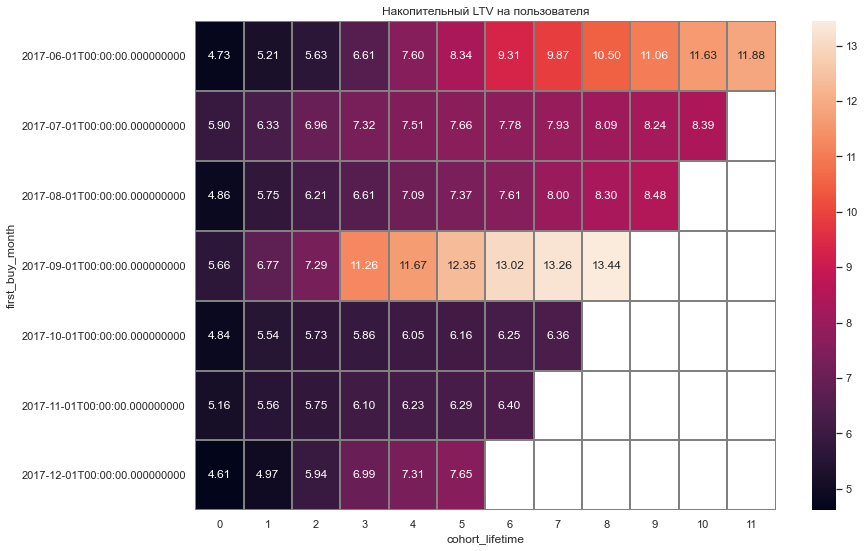

In [113]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Накопительный LTV на пользователя')
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Июньская когорта 2017ого, по-прежнему, показывает хорошие результаты. Но даже лучше показывает себя сентябрьская когорта 2017ого. Ее накопительный LTV выше всех остальных на пользователя. Интересно, что ноябрьская когорта имеет наименьший LTV на человека, несмотря на то, что посещения сайта в ноябре и декабре года - самые высокие, а покупает меньше людей. В июне и сентябре - самые преданные пользователи похоже.

**Маркетинговые метрики**

Рассчитаем и отобразим на графиках, как маркетинговые метрики отличаются по рекламным источникам.

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам и как меняется это распределение во времени.

<a id="6"></a>

In [114]:
# общие расходы на маркетинг

costs['costs'].sum()

329131.62

In [115]:
# по источникам

costs.groupby('source_id', as_index=False).agg({'costs':'sum'}).sort_values(by='costs')

,source_id,costs
5,9,5517.49
6,10,5822.49
0,1,20833.27
1,2,42806.04
4,5,51757.10
3,4,61073.60
2,3,141321.63


In [116]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [117]:
costs_pivot = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
costs_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


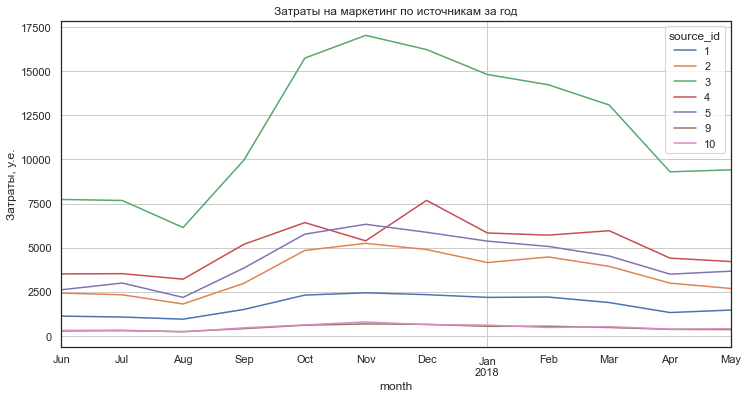

In [118]:
_ = costs_pivot.plot(figsize=(12,6))
plt.grid()
plt.ylabel('Затраты, у.е.')
_ = plt.title('Затраты на маркетинг по источникам за год')

Больше всего расходов с большим отличием осуществлено на третий источник, в частности на когорты с октября по декабрь. На источники 2, 4, и 5 также были потрачены наибольшие суммы. Самые большие траты на маркетинг были осуществлены с октября 2017ого по март 2018ого.

Рассчитаем CAC (Customer Acquisition Cost). Определим, сколько стоит привлечение одного покупателя из каждого источника трафика.

In [119]:
visits_log = visits_log.merge(first_session_ts, on='uid')
visits_log.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,n,session_duration_sec,first_session_date,cohort_lifetime,first_session_month,first_session_ts_x,first_session_ts_y
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1,1080,2017-12-20,0,2017-12-01,2017-12-20 17:20:00,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1,1680,2018-02-19,0,2018-02-01,2018-02-19 16:53:00,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,1,0,2017-07-01,0,2017-07-01,2017-07-01 01:54:00,2017-07-01 01:54:00


In [120]:
source_users = orders_log.groupby(['first_buy_month', 'source_id'], as_index=False).agg({'uid':'nunique'})
source_users = source_users.rename(columns={'uid':'users'})
source_users

,first_buy_month,source_id,users
0,2017-06-01,1,190
1,2017-06-01,2,234
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
80,2018-05-01,4,804
81,2018-05-01,5,497
82,2018-05-01,9,60
83,2018-05-01,10,129


In [121]:
# траты на каждый source

source_costs = costs.groupby('source_id', as_index=False).agg({'costs':'sum'})
source_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [122]:
costs_grouped = costs.groupby(['source_id', 'month'], as_index=False).agg({'costs':'sum'})
costs_grouped = costs_grouped.rename(columns={'month':'first_buy_month'})
costs_grouped

,source_id,first_buy_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [123]:
source_users = source_users.merge(costs_grouped, on=['source_id','first_buy_month'])
source_users

,first_buy_month,source_id,users,costs
0,2017-06-01,1,190,1125.61
1,2017-06-01,2,234,2427.38
2,2017-06-01,3,638,7731.65
3,2017-06-01,4,413,3514.80
4,2017-06-01,5,384,2616.12
...,...,...,...,...
79,2018-05-01,3,844,9411.42
80,2018-05-01,4,804,4214.21
81,2018-05-01,5,497,3669.56
82,2018-05-01,9,60,362.17


In [124]:
# можем посчитать Customer Acquisition Costs (CAC)

source_users['CAC'] = source_users['costs'] / source_users['users']
source_users.head(3)

,first_buy_month,source_id,users,costs,CAC
0,2017-06-01,1,190,1125.61,5.924263
1,2017-06-01,2,234,2427.38,10.373419
2,2017-06-01,3,638,7731.65,12.118574


In [125]:
s = source_users.groupby('source_id').agg({'costs':'sum', 'users': 'sum'})
s['CAC'] = s['costs'] / s['users']
s

,costs,users,CAC
source_id,,,
1,20833.27,2896,7.193809
2,42806.04,3503,12.219823
3,141321.63,10467,13.501637
4,61073.60,10295,5.932356
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1327,4.387709


Источники 2 и 3 - самые дорогие по привлечению пользователя - более 10 у.е. за пользователя.

Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

In [126]:
# cohort_ltv

cohort_ltv['LTV'] = cohort_ltv['revenue'] / cohort_ltv['uid']
cohort_ltv

,first_buy_month,source_id,uid,cohort_lifetime,revenue,LTV
0,2017-06-01,1,190,0,1386.03,7.294895
1,2017-06-01,1,190,1,407.65,2.145526
2,2017-06-01,1,190,2,386.92,2.036421
3,2017-06-01,1,190,3,746.75,3.930263
4,2017-06-01,1,190,4,811.20,4.269474
...,...,...,...,...,...,...
522,2018-05-01,9,60,0,210.52,3.508667
523,2018-05-01,9,60,1,12.53,0.208833
524,2018-05-01,10,129,0,295.30,2.289147
525,2018-05-01,10,129,1,175.59,1.361163


In [127]:
source_users

,first_buy_month,source_id,users,costs,CAC
0,2017-06-01,1,190,1125.61,5.924263
1,2017-06-01,2,234,2427.38,10.373419
2,2017-06-01,3,638,7731.65,12.118574
3,2017-06-01,4,413,3514.80,8.510412
4,2017-06-01,5,384,2616.12,6.812813
...,...,...,...,...,...
79,2018-05-01,3,844,9411.42,11.150972
80,2018-05-01,4,804,4214.21,5.241555
81,2018-05-01,5,497,3669.56,7.383421
82,2018-05-01,9,60,362.17,6.036167


In [128]:
romi = cohort_ltv[['first_buy_month', 'source_id', 'cohort_lifetime', 'LTV']]\
.merge(source_users[['first_buy_month', 'source_id', 'CAC']], on=['first_buy_month', 'source_id'])

romi['ROMI'] = romi['LTV'] / romi['CAC']
romi

,first_buy_month,source_id,cohort_lifetime,LTV,CAC,ROMI
0,2017-06-01,1,0,7.294895,5.924263,1.231359
1,2017-06-01,1,1,2.145526,5.924263,0.362159
2,2017-06-01,1,2,2.036421,5.924263,0.343743
3,2017-06-01,1,3,3.930263,5.924263,0.663418
4,2017-06-01,1,4,4.269474,5.924263,0.720676
...,...,...,...,...,...,...
521,2018-05-01,5,1,0.608491,7.383421,0.082413
522,2018-05-01,9,0,3.508667,6.036167,0.581274
523,2018-05-01,9,1,0.208833,6.036167,0.034597
524,2018-05-01,10,0,2.289147,3.177209,0.720490


In [129]:
romi_pivot = romi.pivot_table(index=['source_id', 'first_buy_month'], columns='cohort_lifetime', values='ROMI')
romi_pivot = romi_pivot.cumsum(axis=1)
romi_pivot

cohort_lifetime                  0         1         2         3         4   \
source_id first_buy_month                                                     
1         2017-06-01       1.231359  1.593518  1.937261  2.600679  3.321355   
          2017-07-01       1.067584  1.249254  2.041990  2.274131  2.405115   
          2017-08-01       0.837016  1.031761  1.151700  1.264696  1.389626   
          2017-09-01       0.909009  1.181317  1.265844  1.405616  1.411475   
          2017-10-01       0.862844  1.038674  1.074611  1.082997  1.140840   
...                             ...       ...       ...       ...       ...   
10        2018-01-01       0.447937  0.466363  0.476813       NaN       NaN   
          2018-02-01       0.637747  0.662390  0.663409       NaN       NaN   
          2018-03-01       1.212819  1.236964  1.248912       NaN       NaN   
          2018-04-01       0.674643       NaN       NaN       NaN       NaN   
          2018-05-01       0.720490  1.148905       NaN       NaN       NaN   

cohort_lifetime                  5         6         7         8         9   \
source_id first_buy_month                                                     
1         2017-06-01       3.642825  4.102993  4.518004  4.936061  5.193673   
          2017-07-01       2.539315  2.605958  2.702315  2.830130  2.977080   
          2017-08-01       1.455900  1.549490  1.864952  2.125330  2.217785   
          2017-09-01       1.430197  1.438725  1.485103  1.574257       NaN   
          2017-10-01       1.156727  1.183642  1.230737       NaN       NaN   
...                             ...       ...       ...       ...       ...   
10        2018-01-01            NaN       NaN       NaN       NaN       NaN   
          2018-02-01            NaN       NaN       NaN       NaN       NaN   
          2018-03-01            NaN       NaN       NaN       NaN       NaN   
          2018-04-01            NaN       NaN       NaN       NaN       NaN   
          2018-05-01            NaN       NaN       NaN       NaN       NaN   

cohort_lifetime                  10        11  
source_id first_buy_month                      
1         2017-06-01       5.400840  5.679045  
          2017-07-01       3.115465       NaN  
          2017-08-01            NaN       NaN  
          2017-09-01            NaN       NaN  
          2017-10-01            NaN       NaN  
...                             ...       ...  
10        2018-01-01            NaN       NaN  
          2018-02-01            NaN       NaN  
          2018-03-01            NaN       NaN  
          2018-04-01            NaN       NaN  
          2018-05-01            NaN       NaN  

[84 rows x 12 columns]

Мы можем построить таблицу с ROMI для каждого отдельного источника по когортам.

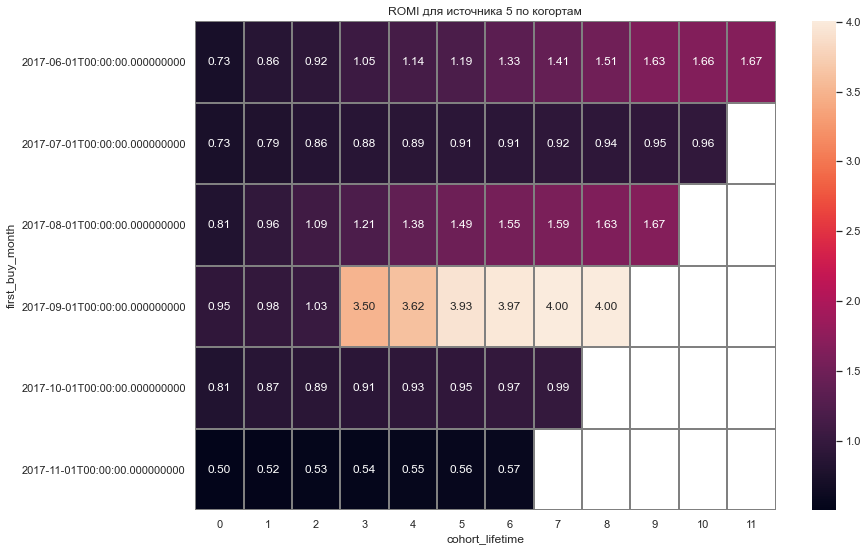

In [130]:
# пример для пятого источника

s = 5
romi_pivot = romi.query(f'source_id=={s}').pivot_table(index='first_buy_month', columns='cohort_lifetime', values='ROMI')
romi_pivot = romi_pivot.cumsum(axis=1)
romi_pivot = romi_pivot[:6]
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title(f'ROMI для источника {s} по когортам')
_ = sns.heatmap(romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

In [131]:
romi_pivot = romi.pivot_table(index=['first_buy_month', 'source_id'], columns='cohort_lifetime', values='ROMI')
romi_pivot = romi_pivot.cumsum(axis=1)
romi_pivot

cohort_lifetime                  0         1         2         3         4   \
first_buy_month source_id                                                     
2017-06-01      1          1.231359  1.593518  1.937261  2.600679  3.321355   
                2          0.430917  0.477560  0.503382  0.690238  0.836499   
                3          0.362709  0.372018  0.387113  0.413080  0.428404   
                4          0.557596  0.562336  0.580155  0.636398  0.770123   
                5          0.725842  0.858378  0.923065  1.052429  1.143017   
...                             ...       ...       ...       ...       ...   
2018-05-01      3          0.288755  0.346020       NaN       NaN       NaN   
                4          0.842058  0.902402       NaN       NaN       NaN   
                5          0.488238  0.570652       NaN       NaN       NaN   
                9          0.581274  0.615871       NaN       NaN       NaN   
                10         0.720490  1.148905       NaN       NaN       NaN   

cohort_lifetime                  5         6         7         8         9   \
first_buy_month source_id                                                     
2017-06-01      1          3.642825  4.102993  4.518004  4.936061  5.193673   
                2          0.940574  1.090262  1.228514  1.380900  1.438889   
                3          0.444349  0.454904  0.457347  0.461477  0.465854   
                4          0.940031  1.114240  1.141630  1.167076  1.261389   
                5          1.193493  1.326380  1.405062  1.511100  1.633308   
...                             ...       ...       ...       ...       ...   
2018-05-01      3               NaN       NaN       NaN       NaN       NaN   
                4               NaN       NaN       NaN       NaN       NaN   
                5               NaN       NaN       NaN       NaN       NaN   
                9               NaN       NaN       NaN       NaN       NaN   
                10              NaN       NaN       NaN       NaN       NaN   

cohort_lifetime                  10        11  
first_buy_month source_id                      
2017-06-01      1          5.400840  5.679045  
                2          1.570417  1.612364  
                3          0.468178  0.470834  
                4          1.410496  1.420471  
                5          1.656212  1.673333  
...                             ...       ...  
2018-05-01      3               NaN       NaN  
                4               NaN       NaN  
                5               NaN       NaN  
                9               NaN       NaN  
                10              NaN       NaN  

[84 rows x 12 columns]

Мы можем построить таблицу с ROMI для каждой когорты по источникам.

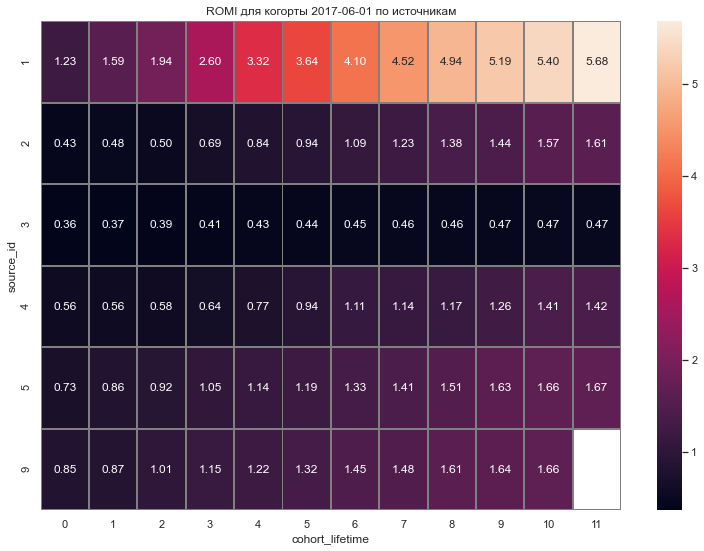

In [132]:
# пример для июньской когорты 2017

m = '2017-06-01'
mask = romi['first_buy_month'] == m
romi_pivot = romi[mask].pivot_table(index='source_id', columns='cohort_lifetime', values='ROMI')
romi_pivot = romi_pivot.cumsum(axis=1)
romi_pivot = romi_pivot[:6]
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title(f'ROMI для когорты {m} по источникам')
_ = sns.heatmap(romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Видим, что источники в разных когортах могли окупиться, а могли и не окупиться.

Просмотрев таблицы по всем когортам и источникам, можно сказать, что третий источник не окупился ни для одной когрты, в то время как певрый источник, наоборот, окупился для всех. Второй источник окупился июньской и сентябрьской когорт 2017ого. Интересно, что четвертый источник окупается для июньской и ноябрьской когорт 2017ого, и не окупается для других. Десятый, также не окупается ни для кого.

## Выводы и рекомендации
<a id="7"></a>

#### Определим источники трафика и тип устройств, на которые маркетологам стоит делать упор. Объясним свой выбор: на какие метрики вы ориентируетесь и почему:

Источники 1 и 9 - имеют историю окупаемости, несмотря на то, что в последние месяцы показатели по ним были низкие, стоит вернуться и посмотреть, почему так произошло. Возможно, уменьшился выделяемый на них бюджет, и это повлияло на показатели. 

Источники 2, 4 и 5 - имеют потенциал, на них стоит обратить внимание и направить внимание маркетинговой команды. Данные источники окупаются не для всех когорт, и часто не с самого первого месяца, тем не менее некоторые когорты окупились сразу (источник 4 для ноябрьской когорты), а некоторые показывают высокий ROMI через несколько месяцев (источники 2 и 5 для сентябрьской когорты).

Источники 3 и 10 - не окупаются вообще, скорее всего от них можно отказаться уже сейчас.

#### Опишем выводы, которые мы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции:

Стоит обратить внимание на удержание пользователей, вне зависимости от времени начала пользования сайтом меньше 7% возвращаются на сайт. С чем и связано среднее в одну покупку на пользователя, данный показатель тоже можно улучшить. (Также будет интересно посмотреть какой процент составляют пользователи, совершающие покупки от пользователей, которые не сделали не единой покупки за все время; а также, посчитать сколько покупок приходится на "покупающих" пользователей). 

Маркетинговой команде стоит обратить внимание на то, как распределяется бюджет по источникам трафика. Третий и десятый источники определенно не выгодны, и от них можно отказаться, или как минимум, снизить расходы на них. Стоит обратить внимание на источники, которые имеют историю окупаемости и проанализировать, что повлияло на ухудшение мтерик по ним. 

Также, по всем показателям пользователи версий для touch-устройств проводят на сайте - меньше. Стоит обратить внимание на удобство пользования touch-версиями сервиса.

#### Подведем итоги когортного анализа. Определим самые перспективные для компании когорты клиентов:

Июньская и сентябрьская когорты 2017ого года показывают себя наиболее лояльными сервису и наиболее окупаемыми - определенно наиболее перспективные. Также стоит обратить внимание на декабрьскую когорту 2017ого - она показывает хорошую динамику, повторяя июньскую когорту по своим показателям.

#### Опишем, как различаются метрики в разрезе устройств:

Намного больше пользователей заходят через desktop устройства. Возможно, стоит узнать, насколько user-friendly мобильная версия. Пользователя desktop проводят в два раза больше времени на сайте. 

Пользователи desktop, также, приносят больше денег сервису. Средняя выручка на пользователя различается в 0.5 y.e. на пользователя desktop и touch, но выручка за весь год по desktop пользователям выше в 3.6 раза. Нужно увеличивать количество пользователей touch-версии, и работать над их удержанием на сайте.